# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
# Your code here.
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})

X = student_data['X']
Y = student_data['Y']

Draw a dispersion diagram (scatter plot) for the data.

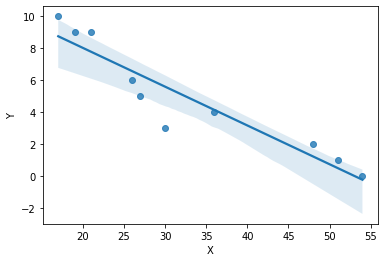

In [3]:
# Your code here.
sns.regplot(X,Y, data=student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
# Not shure but seems like when the student is younger they're late for class more often
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
#correlation:
corl = X.corr(Y) #-0.9391626886887122
print(corl) 

print('\n')
## When the correlation is closer to 1 we have a strong correlation, the fact of the number is negative
## is related to the variables. I think this is a strong negative corelation

#covariance:
np.cov(X, Y)
#The correlation just take 1 as fixed parameter, but intend to measure the correlation of two variables
# The covariance just says if there's the variables are related. Jus says if its positive/negative/or
#0 .
# -45.56666 is the value of a Covariance ( )
# JOÃO INVERNO - CREDITS
#Covariance have units which are very difficult to understand
#if it is positive we can say there positive correlation . UIf negative is a negative correlation
#If it is theres is no correlation

#if the correlation is close to 1 there is a trong positive correlation 


-0.9391626886887122




array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# Your response here.
slope, intersect, r_value, p_value, std_err =stats.linregress(X, Y)
y = slope*X + intersect
x = Y-y


Plot your regression model on your scatter plot.

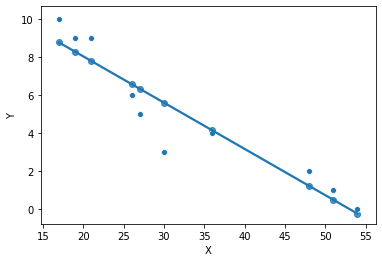

In [7]:
# Your code here.
sns.regplot(X, y)
sns.scatterplot(X,Y)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [8]:
# Your response here. 
#We can predict the behaviour of the students with linear regression based on average for example
# of he age of the students. The model is accurate but have some outliers like student 30

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [35]:
# Import any libraries you may need & the data
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

data = pd.read_csv('vehicles.csv')

In [53]:
data.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [37]:
# Your response here. 
data = data[['Year', 'Cylinders','Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].copy()

In [38]:
data.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [39]:
data.corr()['CO2 Emission Grams/Mile'].sort_values()

Combined MPG              -0.926229
Year                      -0.222300
Cylinders                  0.752393
Fuel Cost/Year             0.930865
Fuel Barrels/Year          0.986189
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [42]:
# Your response here. 

x = data['Fuel Barrels/Year']
y = data['CO2 Emission Grams/Mile']
regress = stats.linregress(x,y)
regression_line = regress[0]*x + regress[1] #Pra toda linha que houver no grafico para cada X um Y
#Vale pra toda linha em fração - Equação do 1º Grau - A(X) + B - 
#A da a inclinação - Slope
#B onde a reta cruza o Y  - Intercept 
#Rvalue = Teria que fazer a Raiz quadrada (Rquared) = r^2


regress
#Intercept - Onde a linha corta o eixo Y 


LinregressResult(slope=26.283625397470242, intercept=12.48652083075757, rvalue=0.9861886621428717, pvalue=0.0, stderr=0.023281123789228333)

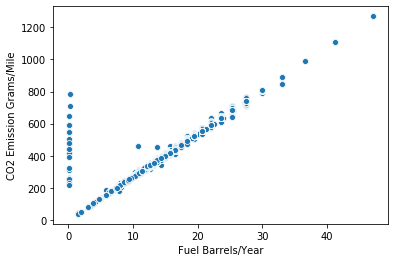

In [27]:
sns.scatterplot(x,y)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

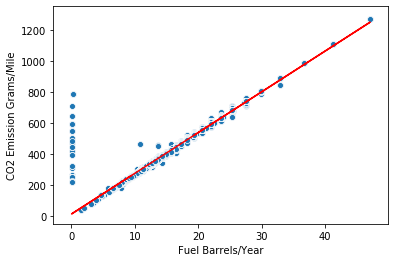

In [44]:
# Your response here. 


x = data['Fuel Barrels/Year']
y = data['CO2 Emission Grams/Mile']
regress = stats.linregress(x,y)
regression_line = regress[0]*x + regress[1]
plt.plot(x , regression_line, c = 'red')
sns.scatterplot(x,y)

In [51]:
import statsmodels.api as sm
X = data[['Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
Y = data['Combined MPG']
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Combined MPG   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.986e+31
Date:                Wed, 29 Jul 2020   Prob (F-statistic):                        0.00
Time:                        19:45:30   Log-Likelihood:                      9.6691e+05
No. Observations:               35952   AIC:                                 -1.934e+06
Df Residuals:                   35949   BIC:                                 -1.934e+06
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fuel Barrels/Year -4.419e-14   1.43e-15    -30.823      0.000    -4.7e-14   -4.14e-14
Combined MPG          1.0000   2.76e-16   3.62e+15      0.000       1.000       1.000
Fuel Cost/Year     7.225e-16   1.31e-17     55.206      0.000    6.97e-16    7.48e-16
==============================================================================
Omnibus:                     6050.400   Durbin-Watson:                   0.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14862.663
Skew:                          -0.948   Prob(JB):                         0.00
Kurtosis:                       5.516   Cond. No.                     1.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [60]:
# Your code here.
party_frame = pd.DataFrame({'X': [1,3,4,6,8,9,11,14],'Y': [1,2,4,4,5,7,8,13]})
party_frame

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

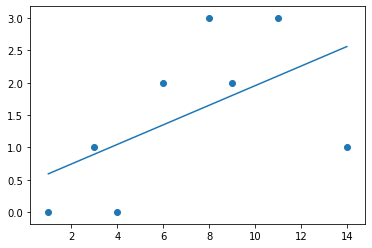

In [62]:
# Your code here.
X = party_frame['X']
Y = party_frame['X'] - party_frame['Y']

slope, intersect, r_value, p_value, std_err = stats.linregress(X, Y)
y = slope*X + intersect

plt.plot(X, y)
plt.scatter(X, Y)


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 

# A lot of outliers not a good fit at all. 


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

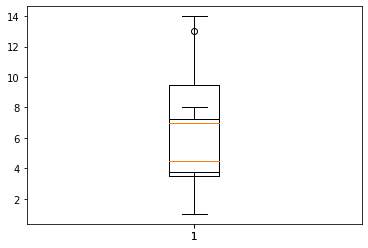

In [65]:
# Your response here. 
plt.boxplot(party_frame['X'])
plt.boxplot(party_frame['Y'])
plt.show()


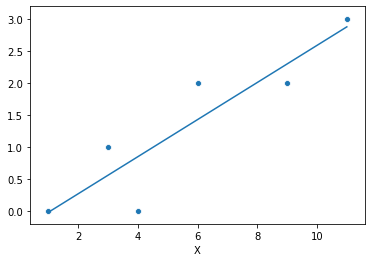

In [68]:
without_outliers = party_frame[(party_frame['X'] != 8) & (party_frame['X'] !=14)]
X = without_outliers['X']
Y = without_outliers['X'] - without_outliers['Y']

slope, intersect, r_value, p_value, std_err = stats.linregress(X, Y)
y = slope*X + intersect

plt.plot(X, y)
sns.scatterplot(X, Y)


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
# I took of the model the Ouliers because they have influence in a bad way to predictions. The 8 and 14
#values were our Outliers 
